# Convolution And Transformations

<br>

## Table of Content
- [Convolution](#convolution)
- [Padding](#padding)
- [Stride](#stride)

<br>

## Convolution 

```text
- Convolution is a mathematical operation that's used to analyze data.
- It's a linear oeration that involves multiplying a filter with an input. The filter is a small array of numbers that's used to extract features from the input.
The output of the convolution operation is a new array of numbers that represents the extracted features.
- Convolution is the dot product of the kernel/filter and the input (image).
- N-kernels produce an N-integer result. i.e. the dot product of an N-filter/kernel an an input produces an N-layer output.
- Odd jernel sizes (3, 5, 7, etc) are preferred. i.e 3X3, 5X5, etc.
- In DL, the kernels are initially chosen at random and learned thru gradient descent. After learning, the kernels are the same for all images.
- Using pre-trained kernels is called 'transfer learning'.
- The kernals are NOT used for classification o making decisions. They're used to extract features. Those features are used for classification or making decisions.


Feature Maps
------------
- These refer to the output of convolutional layers in a neural network.
- Convolutional layers are used in DL for tasks such as image recognition or computer vision.
- When an input data such as image is fed into a convolutional layer, it undergoes a series of convolutions with learnable filters. These convolutions are element-wise multiplication (dot product) of the filter with local patches of the input data followed by a summation. The result of each convolution is a single value that represens a specific feature or pattern present in the input.
- The collection of the computed values is known as feature map.
```

In [1]:
# Built-in library
import logging
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import numpy.typing as npt
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Configure the backend
import matplotlib_inline.backend_inline

# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
import seaborn as sns

# Custom import
from src.utilities import (
    set_up_logger,
    create_iris_data,
    create_qwerties_data,
    smooth,
)
from src.data_manager import (
    load_data,
    create_data_loader,
    split_into_train_n_validation,
)
from src.preprocessor import Standardizer, Normalizer


# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

### Intro To Convolution

In [2]:
import matplotlib.image as img

image = img.imread("../../data/Stedelijk_Museum_Amsterdam.jpg")

# Image size
image.shape

(670, 1200, 3)

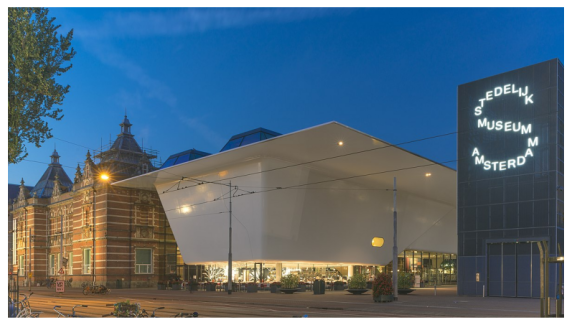

In [3]:
# Visualize the image
fig = plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis("off")
plt.show()

In [4]:
# Transform to 2D (Easier for convolution but not necessary)
# This calculates the mean along the flattened axis.
image_ = np.mean(image, axis=2)

# Normalize
image_ = image_ / np.max(image_)

# Image size
image_.shape

(670, 1200)

In [5]:
# Manually create 2 convolution kernels
v_kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
h_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Convert to a 4D tensor
# Note: (1,1,3,3): # of images in a batch, # of channels, height, width.
# # of channels = 1 (since the color is greyed out)
v_kernel_T = torch.Tensor(v_kernel).view(1, 1, 3, 3)
h_kernel_T = torch.Tensor(h_kernel).view(1, 1, 3, 3)
image_T = torch.Tensor(image_).view(1, 1, image_.shape[0], image_.shape[1])

# Apply a 2D convolution over an input signal composed of several input planes.
C = F.conv2d(image_T, v_kernel_T)

# The shape of the data has dropped from (670, 1200) to (x, y, 668, 1198) because
# convolution reduces image size as the filter slides over the image, leaving some
# pixels uncovered and excluding them from the output.
C.shape

torch.Size([1, 1, 668, 1198])

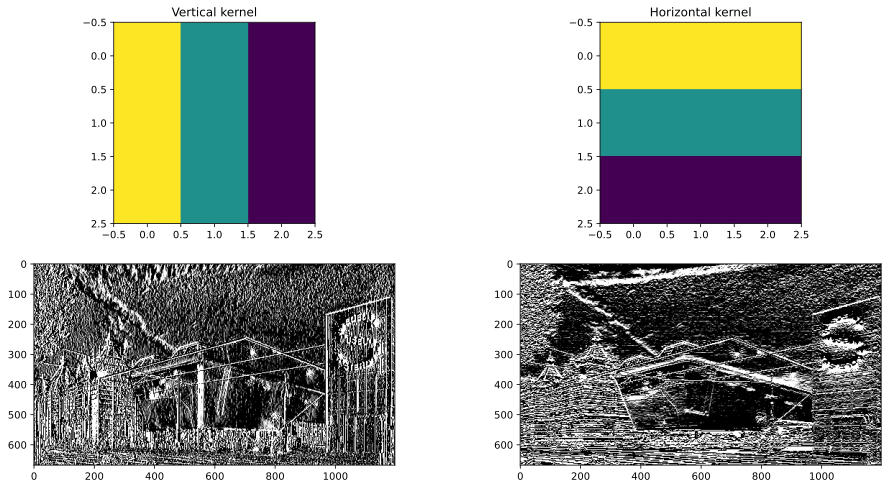

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

ax[0, 0].imshow(v_kernel)
ax[0, 0].set_title("Vertical kernel")

ax[0, 1].imshow(h_kernel)
ax[0, 1].set_title("Horizontal kernel")

# Apply convolution and show the result
conv_result = F.conv2d(image_T, v_kernel_T)
# Convert to 2D by removing the dims that are equal to 1
img = torch.squeeze(conv_result.detach())
ax[1, 0].imshow(img, cmap="gray", vmin=0, vmax=0.01)

conv_result = F.conv2d(image_T, h_kernel_T)
img = torch.squeeze(conv_result.detach())
ax[1, 1].imshow(img, cmap="gray", vmin=0, vmax=0.01)

plt.show()

## Padding

```text
- This is used to increase the size of the result of convolution so that the output matches with the size of the input data.
- It's a technique used to add zeros aound the edges of an input data before it's convolved with a filter. This is done to preserve the size of the input data after convolution.
- It's important for tasks such as image classification where it's important to presere the spatial information of the image.
```
<br>

## Stride

```text
- It's a parameter that controls how the convolution parameter moves over the input data. i.e. the number of pixels that the filter is moved over the input data in each step.
- A larger stride will result in a smaller output data while a smaller stride will result in a larger output data size.

Advantages of Using Stride
--------------------------
- It can reduce the computational complexity of the CNN.
- It can also reduce overfitting by reducing the amount of data the model is trained on.

Disadvantages
-------------
- It can reduce accuracy of the model by reducing the amount of information the model is able to learn from.
- It can also make the model more sensitive to noise in the input data.
```

### PyTorch's Conv2D Class

In [7]:
IN_CHANNELS = 3  # RGB: Number of channels in the input image
OUT_CHANNELS = 15  # Number of channels produced by the convolution
KERNEL_SIZE = 5  # Should be an odd number
STRIDE = 1  # Means no stride!
PADDING = 0  # Padding added to all four sides of the input. Default: 0

c = nn.Conv2d(
    in_channels=IN_CHANNELS,
    out_channels=OUT_CHANNELS,
    kernel_size=KERNEL_SIZE,
    stride=STRIDE,
    padding=PADDING,
)

c

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))

In [8]:
dir(c)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_conv_forward',
 '_forward_hooks',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_s

In [9]:
# output_channels, input_channels, kernel_size, kernel_size
c.weight.shape

torch.Size([15, 3, 5, 5])

In [10]:
c.bias.shape

torch.Size([15])

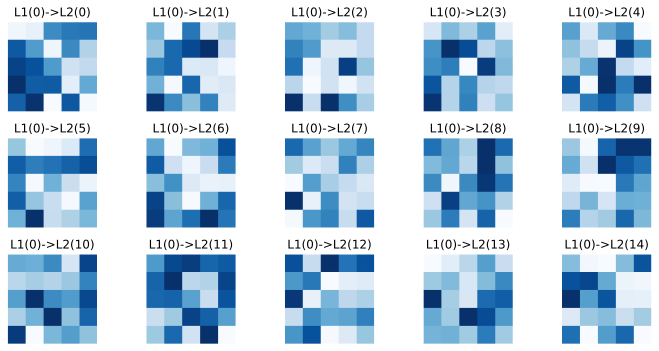

In [11]:
# Visualize the kernels
fig, axs = plt.subplots(3, 5, figsize=(10, 5))

for idx, ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(c.weight[idx, 0, :, :]).detach(), cmap=plt.cm.Blues)
    ax.set_title(f"L1(0)->L2({idx})")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [12]:
# Create a random image
image_size = (1, 3, 64, 64)
image = torch.rand(image_size)

# PyTorch wants the channels 1st, but Matplotlib wants the channels last.
# Therefore, the image (tensor) must be permuted.
# 2, 3, 1, 0 are the indices of the original tensor
image_2_view = image.permute(2, 3, 1, 0).numpy()

print(f"\nOriginal image: {image.shape}")
print(f"\nimage_2_view: {image_2_view.shape}")


Original image: torch.Size([1, 3, 64, 64])

image_2_view: (64, 64, 3, 1)


In [13]:
# Convolve the image with the filter
conv_result = c(image)

print(f"\nOriginal image: {image.shape}")
print(f"Kernel: {c.weight.shape}")

# The size of the convolved image is reduced and can be preserved using `padding`
print(f"Convolved image: {conv_result.shape}")


Original image: torch.Size([1, 3, 64, 64])
Kernel: torch.Size([15, 3, 5, 5])
Convolved image: torch.Size([1, 15, 60, 60])


##### Convoluted Image Shape Explanation

```text
Convolved image: [1, 15, 60, 60]
---------------
1 => The number of images.
15 => The number of feature maps which is as a result of the convolution.
60x60 => The size as a result of the convolution.
```

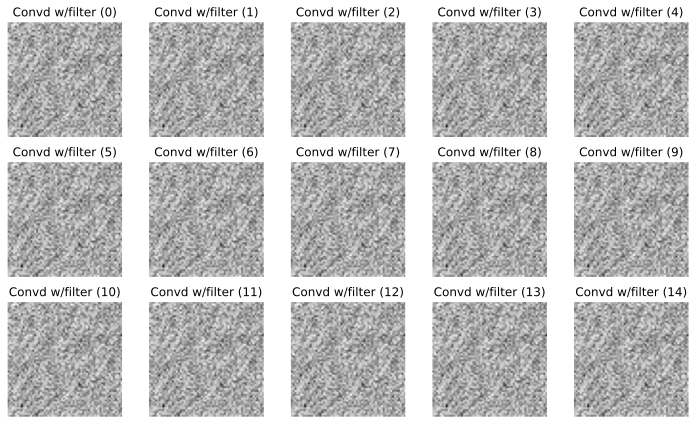

In [14]:
# Visualize the convolved image with 15 feature maps
fig, axs = plt.subplots(3, 5, figsize=(10, 6))


for idx, ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(conv_result[0, 1, :, :]).detach(), cmap=plt.cm.Greys)
    ax.set_title(f"Convd w/filter ({idx})")
    ax.axis("off")

plt.tight_layout()
plt.show()